In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the dataset
data = pd.read_csv("/content/sample_data/california_housing_train.csv")
df = pd.DataFrame({'x1': data['housing_median_age'], 'x2': data['total_rooms'], 'x3': data['total_bedrooms'], 'x4': data['median_income'], 'y':data['median_house_value']})
print(df)

         x1      x2      x3      x4         y
0      15.0  5612.0  1283.0  1.4936   66900.0
1      19.0  7650.0  1901.0  1.8200   80100.0
2      17.0   720.0   174.0  1.6509   85700.0
3      14.0  1501.0   337.0  3.1917   73400.0
4      20.0  1454.0   326.0  1.9250   65500.0
...     ...     ...     ...     ...       ...
16995  52.0  2217.0   394.0  2.3571  111400.0
16996  36.0  2349.0   528.0  2.5179   79000.0
16997  17.0  2677.0   531.0  3.0313  103600.0
16998  19.0  2672.0   552.0  1.9797   85800.0
16999  52.0  1820.0   300.0  3.0147   94600.0

[17000 rows x 5 columns]


In [6]:
# Split dataset
training_df = df.iloc[:(int((len(df)*0.8))), :]
testing_df = df.iloc[(int((len(df)*0.8))):, :]

# Calculate coefficients using gradient descent
X_train = training_df[['x1', 'x2', 'x3', 'x4']]
y_train = training_df['y']

# Tambahkan satu kolom bernilai 1 pada data X_training supaya bari dan kolom antara X dan y sama, sehingga bisa di kalikan  
X_train = np.c_[np.ones(len(X_train)), X_train]

# beri nilai awal theta yaitu 0
theta = np.zeros(X_train.shape[1])
print(theta)

# tentukan alpha (learning rate), karena datanya banyak, alphanya kecil
alpha = 0.0000001

# tentukan banyak data training, disimpan di m, banyak iterasi (num_iters)
m = len(y_train)
print(m)
num_iters = 100000

# buat array untuk menyimpan perubahan nilai cost overtime
J_history = []


[0. 0. 0. 0. 0.]
13600


Mean Squared Error:  15636127048.923723


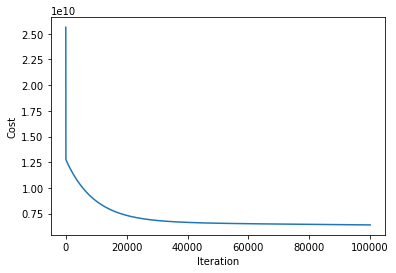

In [7]:
# hitung theta sebanyak num_iters kali
for i in range(num_iters):

  # mencari data prediksi dengan rumus regresi
  y_pred = X_train @ theta

  # mencari error dari selisih data prediksi dengan data asli
  error = y_pred - y_train

  # rumus cost function
  cost = 1/(2*m) * np.sum(error**2)
  J_history.append(cost)

  # rumus gradient descent untuk multivariate menggunakan numpy
  gradient = 1/m * X_train.T @ error

  # update theta terbaru 
  theta = theta - alpha * gradient

# TEST SET
# Use the coefficients to make predictions on the test set
# rumus regresi multivariate adalah perkalian matirks X_test dengan matriks bersi theta/koefisien regresi
X_test = testing_df[['x1', 'x2', 'x3', 'x4']]

# supaya matriks bisa dikalikan, jumlah kolom X dengan jumlah bari Y harus sama. Sehingga ditambah 1 kolom bernilai angka 1 dimatriks y.
X_test = np.c_[np.ones(len(X_test)), X_test]
y_pred = X_test @ theta
y_test = testing_df['y']

# Calculate mean squared error as a metric
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error: ", mse)

# Plot the cost function over the number of iterations
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

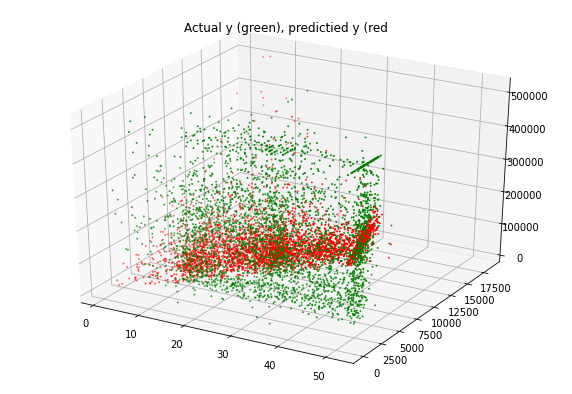

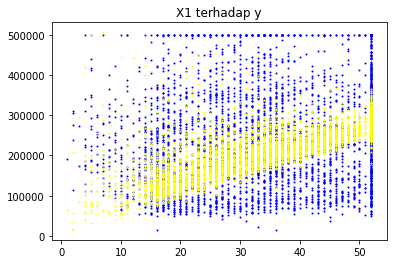

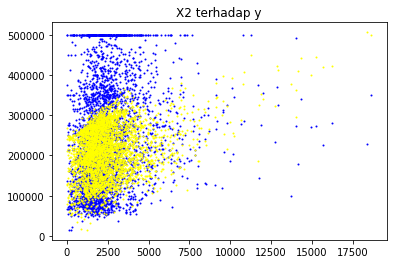

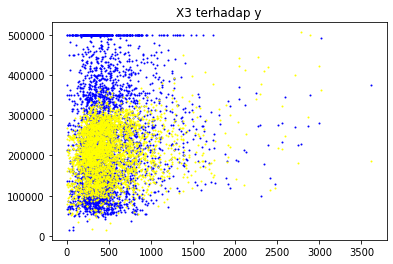

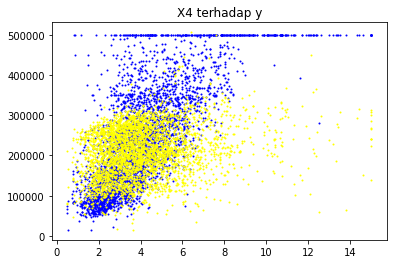

In [9]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection = "3d")

# Creating plot
ax.scatter3D(testing_df['x1'], testing_df['x2'], y_pred, color = "red", s = 1)
ax.scatter3D(testing_df['x1'], testing_df['x2'], y_test, color = "green", s = 1)

plt.title("Actual y (green), predictied y (red")

plt.show()
print("          ")
# berbagai plot relasi antara x1, x2, x3, x4 dengan y
plt.scatter(testing_df['x1'], y_test, color="blue", s = 1)
plt.scatter(testing_df['x1'], y_pred, color="yellow", s = 1)
plt.title("X1 terhadap y")
plt.show()
print("          ")

plt.scatter(testing_df['x2'], y_test, color="blue", s = 1)
plt.scatter(testing_df['x2'], y_pred, color="yellow", s = 1)
plt.title("X2 terhadap y")
plt.show()
print("          ")

plt.scatter(testing_df['x3'], y_test, color="blue", s = 1)
plt.scatter(testing_df['x3'], y_pred, color="yellow", s = 1)
plt.title("X3 terhadap y")
plt.show()
print("          ")

plt.scatter(testing_df['x4'], y_test, color="blue", s = 1)
plt.scatter(testing_df['x4'], y_pred, color="yellow", s = 1)
plt.title("X4 terhadap y")
plt.show()